**CNNによる2次元顔画像表情判定**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten,MaxPooling2D,Conv2D
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

In [3]:
keras.__version__

'2.6.0'

**訓練画像、検証画像、テスト画像のディレクトリ**

In [4]:
classes = ['angry', 'disgust','fear','happy','neutral','sad','suprise']
nb_classes = len(classes)
batch_size_for_data_generator = 20

base_dir = '/content/drive/MyDrive/kaggle/Facial Experience'

train_dir = base_dir+'/train'
validation_dir = base_dir+'/valid'
test_dir = base_dir+'/test'

'''
train_angry_dir = train_dir+'/angry'
train_disgust_dir = train_dir+ '/disgust'
train_fear_dir = train_dir+'/fear'
train_happy_dir = train_dir+'/happy'
train_neutral_dir = train_dir+'/neutral'
train_sad_dir = train_dir+'/sad'
train_suprise_dir = train_dir+'/suprise'

validation_angry_dir = validation_dir+'/angry'
validation_disgust_dir = validation_dir+ '/disgust'
validation_fear_dir = validation_dir+'/fear'
validation_happy_dir = validation_dir+'/happy'
validation_neutral_dir = validation_dir+'/neutral'
validation_sad_dir = validation_dir+'/sad'
validation_suprise_dir = validation_dir+'/suprise'

test_angry_dir = test_dir+'/angry'
test_disgust_dir = test_dir+ '/disgust'
test_fear_dir = test_dir+'/fear'
test_happy_dir = test_dir+'/happy'
test_neutral_dir = test_dir+'/neutral'
test_sad_dir = test_dir+'/sad'
test_suprise_dir = test_dir+'/suprise'
'''

# 平均ぐらいの画像サイズがいいらしい
img_rows, img_cols = 48, 48

os.path.join(base_dir,'path')

**ImageDataGeneratorを使って画像データを拡張する**

In [6]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(img_rows, img_cols),
                                                    color_mode='rgb',
                                                    classes=classes,
                                                    class_mode='categorical',
                                                    batch_size=1117,
                                                    shuffle=True)

Found 84892 images belonging to 7 classes.


train 84892枚
2x2x19x1117
バッジサイズ2048

In [7]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_generator = test_datagen.flow_from_directory(directory=validation_dir,
                                                        target_size=(img_rows, img_cols),
                                                        color_mode='rgb',
                                                        classes=classes,
                                                        class_mode='categorical',
                                                        batch_size=131,
                                                        shuffle=True)

Found 21615 images belonging to 7 classes.


valid 21615枚 3x5x11x131 バッジサイズ2048

**CNNモデル**

なんで512?→特に理由なし1024でもなんでもいい

dropoutの役割→層から層への伝達の際に出力データを意図的に0とする事で、訓練データに過剰適合する問題を回避する。

In [8]:
model=Sequential()
# 畳み込み層
model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(img_rows, img_cols, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

# 全結合層
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))

# 出力層
model.add(Dense(nb_classes, activation='softmax'))
          
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         7

In [9]:
opt = Adam(lr=0.001, decay=1e-6)
model.compile(loss='categorical_crossentropy',optimizer= opt, metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


**学習**

In [10]:
history = model.fit(train_generator,
                    steps_per_epoch=76,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=165,
                    verbose=1)

Epoch 1/10
76/76 [==============================] - 25871s 341s/step - loss: 1.5333 - acc: 0.3462 - val_loss: 1.4115 - val_acc: 0.3734
Epoch 2/10
76/76 [==============================] - 462s 6s/step - loss: 1.4546 - acc: 0.3749 - val_loss: 1.4051 - val_acc: 0.4186
Epoch 3/10
76/76 [==============================] - 458s 6s/step - loss: 1.4292 - acc: 0.3934 - val_loss: 1.3592 - val_acc: 0.4237
Epoch 4/10
76/76 [==============================] - 458s 6s/step - loss: 1.4070 - acc: 0.4106 - val_loss: 1.3662 - val_acc: 0.3938
Epoch 5/10
76/76 [==============================] - 461s 6s/step - loss: 1.3790 - acc: 0.4359 - val_loss: 1.3681 - val_acc: 0.4037
Epoch 6/10
76/76 [==============================] - 459s 6s/step - loss: 1.3245 - acc: 0.4766 - val_loss: 1.3496 - val_acc: 0.4519
Epoch 7/10
76/76 [==============================] - 455s 6s/step - loss: 1.2493 - acc: 0.5248 - val_loss: 1.3628 - val_acc: 0.4329
Epoch 8/10
76/76 [==============================] - 453s 6s/step - loss: 1.1919

In [11]:
hdf5_file = os.path.join(base_dir, 'mask-model_cnn.hdf5')
model.save(hdf5_file)

In [12]:
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

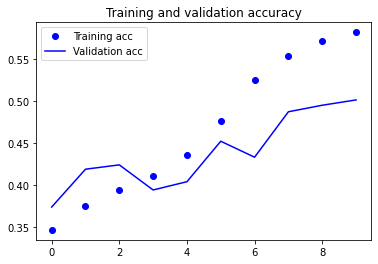

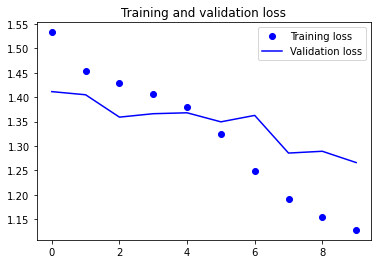

In [14]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [15]:
test_generator = test_datagen.flow_from_directory(directory=test_dir,
                                                  target_size=(img_rows, img_cols),
                                                  color_mode='rgb',
                                                  classes=classes,
                                                  class_mode='categorical',
                                                  batch_size=batch_size_for_data_generator)

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print('test acc:', test_acc)

Found 16021 images belonging to 7 classes.
50/50 [==============================] - 250s 5s/step - loss: 1.2035 - acc: 0.5490
test acc: 0.5490000247955322


**参考**


*   [Keras / CNN] 多クラス画像分類 --- ラーメンの味分類

    https://qiita.com/Phoeboooo/items/cfe8560fe8a285855340
*   リスト項目

